In [ ]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import sys
import joblib
from scipy.special import softmax
import sasc.config
import numpy as np
from collections import defaultdict
from copy import deepcopy
import pandas as pd
import sasc.analyze_helper
# from sasc.modules.fmri_module import convert_module_num_to_voxel_num

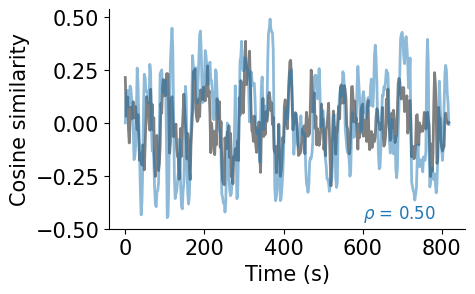

In [34]:
actual, pred = joblib.load(
    join(sasc.config.RESULTS_DIR, 'processed', "cosine_sim_checkerboard.jbl"))

plt.figure(figsize=(5, 3.2))
pred[0] = 0
x = np.arange(len(actual)) * 2
plt.plot(x, actual, '-', color='gray', lw=2)
plt.plot(x, pred, '-', color='C0', lw=2, alpha=0.5)
plt.xlabel('Time (s)')

corr = np.corrcoef(actual, pred)[0, 1]
# add text to bottom of plot
plt.text(600, -.45, f'$\\rho$ = {corr:.2f}', fontsize=12, color='C0')

plt.yticks([-.5, -.25, 0, .25, .5])
plt.ylabel('Cosine similarity')
# turn on all splines
# for spine in plt.gca().spines.values():
# spine.set_visible(True)

# make spline thick
# spine.set_linewidth(3)
plt.savefig(join(sasc.config.RESULTS_DIR, 'figs',

            'misc', 'checkerboard_cosine_sim.pdf'), bbox_inches='tight')